# Credit Card Lead Prediction
Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.
The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)



# 1. Explortary Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\LC Ranga\Downloads\train_s3TEQDk.csv')

In [3]:
df.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


# Variables Info
Categorical Variables: Gender, Region_Code, Occupation, Channel_Code,
Credit_Product, Is_Active.

Continous Variables: Age, Vintage, Avg_Account_Balance.

Target Variable: Is_Lead

In [5]:
df.isnull().sum(axis=0)

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

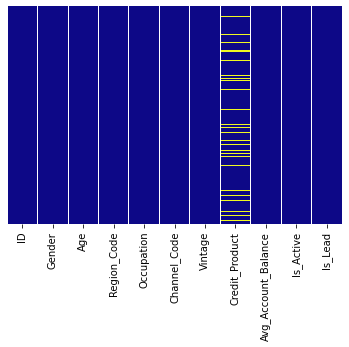

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [7]:
# Only Credit_Product has Null Values.
#So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section.

In [8]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

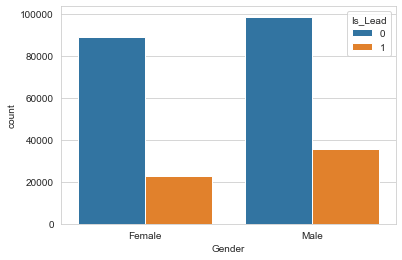

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=df,hue='Is_Lead')

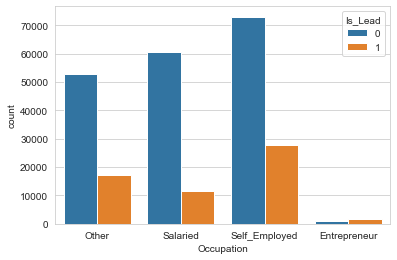

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Occupation',data=df,hue='Is_Lead')

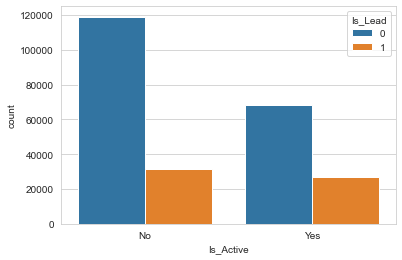

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Is_Active',data=df,hue='Is_Lead')

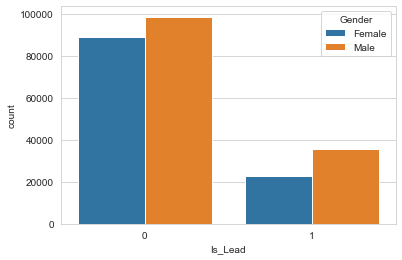

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Is_Lead',data=df,hue='Gender')

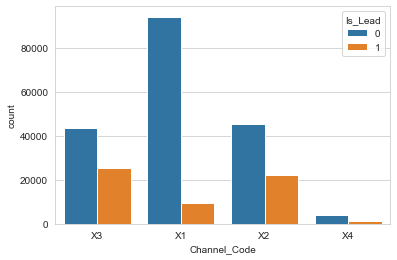

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Channel_Code',data=df,hue='Is_Lead')

In [14]:
# The order of leads in Channel_code is X3,X2,X1 and X4.

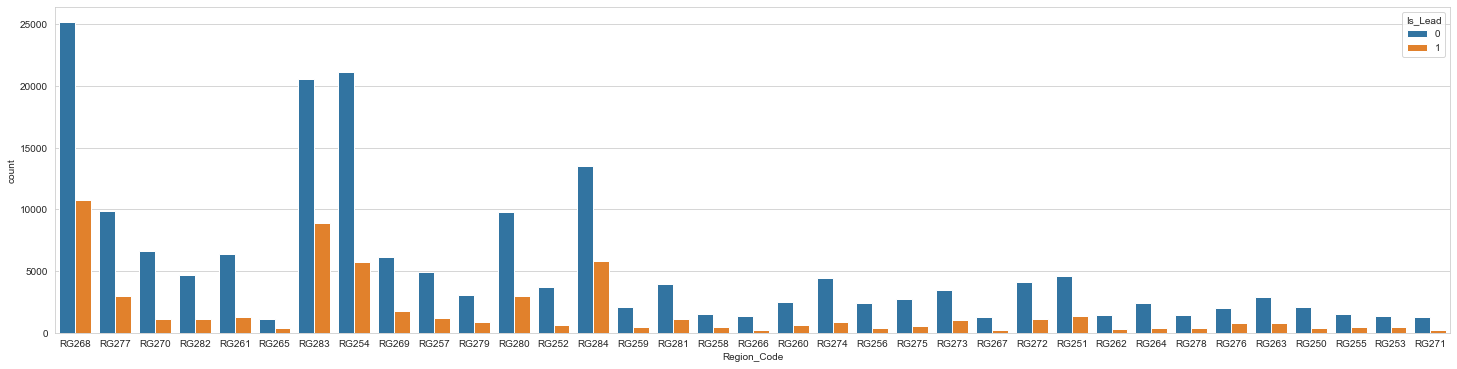

In [15]:
plt.figure(figsize=(25,6))
sns.set_style('whitegrid')
sns.countplot(x='Region_Code',data=df,hue='Is_Lead')

In [16]:
# Only a few Region_Codes have higer counts such as RG268,RG283,RG254 and RG284 rest regions have similar behaviour.

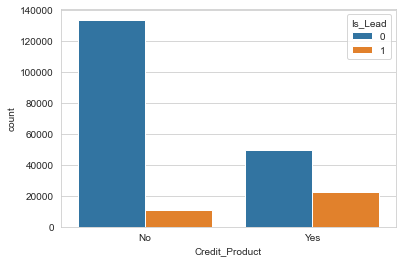

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Credit_Product',data=df,hue='Is_Lead')

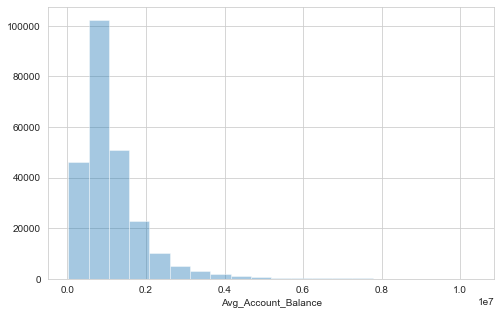

In [18]:
plt.figure(figsize=(8,5))
sns.distplot(df['Avg_Account_Balance'],bins=20,kde=False)

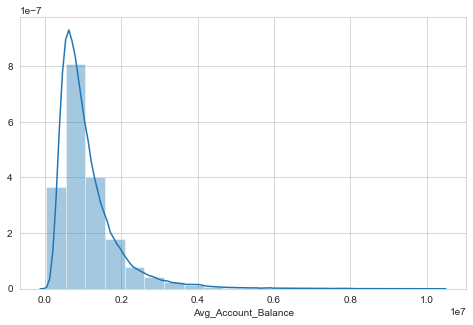

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(df['Avg_Account_Balance'],bins=20,kde=True)

In [20]:
# Distribution of Avg_Account_Balance is Right skew.

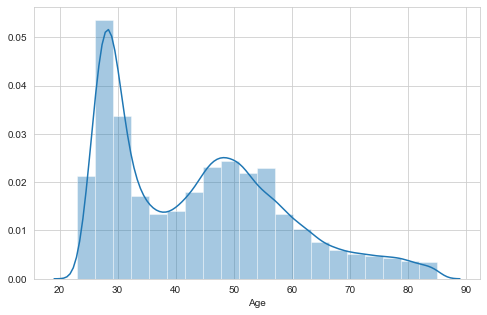

In [21]:
plt.figure(figsize=(8,5))
sns.distplot(df['Age'],bins=20,kde=True)

In [22]:
#Distribution of Age is not sysmetric.

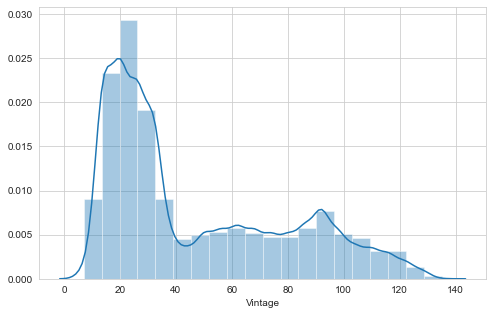

In [23]:
plt.figure(figsize=(8,5))
sns.distplot(df['Vintage'],bins=20,kde=True)

In [24]:
#Distribution of Age is not sysmetric.

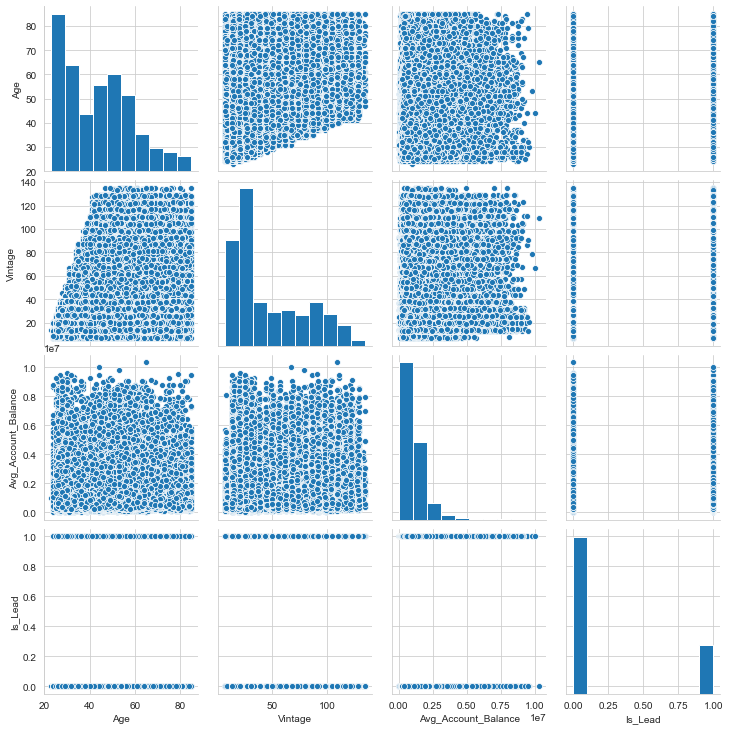

In [25]:
sns.pairplot(df)

In [26]:
df.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


In [27]:
# There is no strong correlation between anytwo features.
# Age and Vintage have some positive correlation.

# 2. Feature Engineering

Handling Missing Values

In [28]:
df['Credit_Product'].isnull().mean()

0.11934072642181301

In [29]:
# Approx 11.9% of data have missing values.

In [30]:
df['Credit_Product'].fillna('YN',inplace=True)

In [31]:
# Replacing missing values with YN not known new feature.

In [32]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [33]:
# Handling Outliers 
#Applying log Trasnsformation.

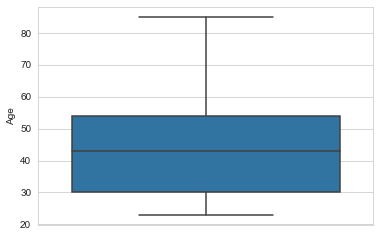

In [34]:
sns.boxplot(x='Age',data=df,orient='v')

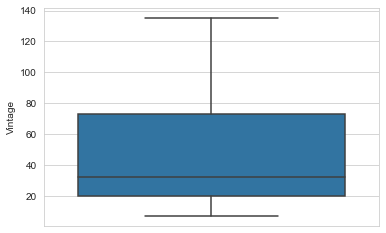

In [35]:
sns.boxplot(x='Vintage',data=df,orient='v')

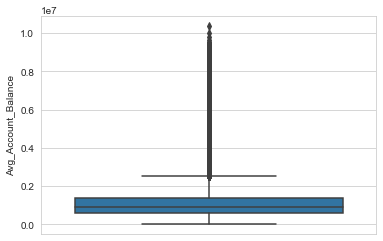

In [36]:
sns.boxplot(x='Avg_Account_Balance',data=df,orient='v')

In [37]:
# Avg_Account_Balance is Right Skewed, Applying Log Trasformation
df['Avg_Account_Balance_log']=np.log(df['Avg_Account_Balance'])

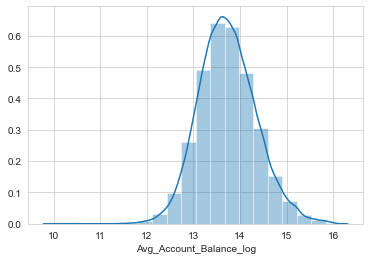

In [38]:
sns.distplot(df['Avg_Account_Balance_log'],bins=20,kde=True)

In [39]:
df['Avg_Account_Balance_log'].describe()

count    245725.000000
mean         13.733421
std           0.619758
min           9.942227
25%          13.311843
50%          13.704133
75%          14.127885
max          16.152691
Name: Avg_Account_Balance_log, dtype: float64

In [40]:
#Lets compute the Interquantile range to calculate the boundaries
IQR=df['Avg_Account_Balance_log'].quantile(0.75)-df['Avg_Account_Balance_log'].quantile(0.25)
IQR

0.8160421649165492

In [41]:
# Extrweme Bounderies
lower_bridge=df['Avg_Account_Balance_log'].quantile(0.25)-(IQR*3)
upper_bridge=df['Avg_Account_Balance_log'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

10.863716095535233
16.57601124995108


(None, None)

In [42]:
df.loc[df['Avg_Account_Balance_log']>=16.58,'Avg_Account_Balance_log']=16.57601124995108
df.loc[df['Avg_Account_Balance_log']<=10,'Avg_Account_Balance_log']=10.863716095535233

In [43]:
# Mean Encoding for Regional code.

In [44]:
mean_ordinal=df.groupby(['Region_Code'])['Is_Lead'].mean().to_dict()

In [45]:
mean_ordinal

{'RG250': 0.15745192307692307,
 'RG251': 0.23210084033613446,
 'RG252': 0.13812412505832944,
 'RG253': 0.2588805166846071,
 'RG254': 0.21285394932935917,
 'RG255': 0.232408325074331,
 'RG256': 0.14085001756234633,
 'RG257': 0.19177184068185543,
 'RG258': 0.2203997949769349,
 'RG259': 0.1937354988399072,
 'RG260': 0.1909967845659164,
 'RG261': 0.16795493252980478,
 'RG262': 0.18064876957494408,
 'RG263': 0.22186059126661242,
 'RG264': 0.13712853562477623,
 'RG265': 0.258732212160414,
 'RG266': 0.1394169835234474,
 'RG267': 0.14896459585838343,
 'RG268': 0.2997996326598764,
 'RG269': 0.22167111789393362,
 'RG270': 0.14430051813471503,
 'RG271': 0.16926070038910507,
 'RG272': 0.2199162223914699,
 'RG273': 0.23771403157660662,
 'RG274': 0.16496405599697314,
 'RG275': 0.16733436055469955,
 'RG276': 0.2778581765557164,
 'RG277': 0.23195072508966164,
 'RG278': 0.21953896816684962,
 'RG279': 0.2256036217303823,
 'RG280': 0.23553816046966733,
 'RG281': 0.21873159238170037,
 'RG282': 0.192142734

In [46]:
df['Region_Code_Encode']=df['Region_Code'].map(mean_ordinal)
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Avg_Account_Balance_log,Region_Code_Encode
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,13.860193,0.299800
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,13.274205,0.231951
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,14.210464,0.299800
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,13.061453,0.144301
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,13.695360,0.192143


In [47]:
# One hot an coding for Gender,Occupation,Channel_Code,Credit_Product,Is_Active

In [48]:
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Avg_Account_Balance_log,Region_Code_Encode
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,13.860193,0.299800
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,13.274205,0.231951
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,14.210464,0.299800
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,13.061453,0.144301
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,13.695360,0.192143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,YN,1925586,No,0,14.470741,0.301035
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0,13.668114,0.299800
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0,13.416016,0.218732
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0,12.917806,0.237714


In [49]:
# One hot an coding for Gender,Occupation,Channel_Code,Credit_Product,Is_Active

In [50]:
df_new=pd.get_dummies(df,columns=['Gender','Occupation', 'Channel_Code','Credit_Product','Is_Active'],drop_first=True)

In [51]:
df_new

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Avg_Account_Balance_log,Region_Code_Encode,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_YN,Credit_Product_Yes,Is_Active_Yes
0,NNVBBKZB,73,RG268,43,1045696,0,13.860193,0.299800,0,1,0,0,0,1,0,0,0,0
1,IDD62UNG,30,RG277,32,581988,0,13.274205,0.231951,0,0,1,0,0,0,0,0,0,0
2,HD3DSEMC,56,RG268,26,1484315,0,14.210464,0.299800,0,0,0,1,0,1,0,0,0,1
3,BF3NC7KV,34,RG270,19,470454,0,13.061453,0.144301,1,0,1,0,0,0,0,0,0,0
4,TEASRWXV,30,RG282,33,886787,0,13.695360,0.192143,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,51,RG284,109,1925586,0,14.470741,0.301035,1,0,0,1,0,1,0,1,0,0
245721,HFNB7JY8,27,RG268,15,862952,0,13.668114,0.299800,1,0,1,0,0,0,0,0,0,1
245722,GEHAUCWT,26,RG281,13,670659,0,13.416016,0.218732,0,0,1,0,0,0,0,0,0,0
245723,GE7V8SAH,28,RG273,31,407504,0,12.917806,0.237714,0,0,1,0,0,0,0,0,0,0


In [52]:
y=df['Is_Lead']

In [53]:
y

0         0
1         0
2         0
3         0
4         0
         ..
245720    0
245721    0
245722    0
245723    0
245724    0
Name: Is_Lead, Length: 245725, dtype: int64

In [54]:
x=df_new.drop(['ID','Is_Lead','Avg_Account_Balance','Region_Code'],axis=1)

In [55]:
x

,Age,Vintage,Avg_Account_Balance_log,Region_Code_Encode,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_YN,Credit_Product_Yes,Is_Active_Yes
0,73,43,13.860193,0.299800,0,1,0,0,0,1,0,0,0,0
1,30,32,13.274205,0.231951,0,0,1,0,0,0,0,0,0,0
2,56,26,14.210464,0.299800,0,0,0,1,0,1,0,0,0,1
3,34,19,13.061453,0.144301,1,0,1,0,0,0,0,0,0,0
4,30,33,13.695360,0.192143,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,109,14.470741,0.301035,1,0,0,1,0,1,0,1,0,0
245721,27,15,13.668114,0.299800,1,0,1,0,0,0,0,0,0,1
245722,26,13,13.416016,0.218732,0,0,1,0,0,0,0,0,0,0
245723,28,31,12.917806,0.237714,0,0,1,0,0,0,0,0,0,0


# 3. Train Test Split, Creating &Training Model 

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model=LogisticRegression(max_iter=10000)

In [59]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [60]:
y_predict=model.predict(x_test)

In [61]:
model.score(x_test,y_test)

0.8528466202742848

In [62]:
y_pred1=model.predict_proba(x_test)

In [63]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_predict)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.8528466202742848
roc_auc_score: 0.8567474864283214


# 4. Hyperparameter RandomizedSearchCV

In [64]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' :  [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100,200,500, 1000,2500, 5000]
    }
]

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
grid_search= RandomizedSearchCV(model, param_distributions= param_grid, cv = 3, verbose=True, n_jobs=10)

In [67]:
grid_result = grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 out of  30 | elapsed:  1.3min finished
C:\Users\LC Ranga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [68]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.853295 using {'solver': 'sag', 'penalty': 'none', 'max_iter': 2500, 'C': 0.001}


# 5. Test Data
Performer similar operation to test data.

In [69]:
df_test=pd.read_csv(r'C:\Users\LC Ranga\Desktop\Data Science\JOB-A-THON - May 2021\test_mSzZ8RL.csv')

In [70]:
df_test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [71]:
df_test.isnull().sum(axis=0)

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [72]:
df_test['Credit_Product'].fillna('YN',inplace=True)

In [73]:
df_test['Avg_Account_Balance_log']=np.log(df['Avg_Account_Balance'])

In [74]:
df_test['Region_Code_Encode']=df_test['Region_Code'].map(mean_ordinal)
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Avg_Account_Balance_log,Region_Code_Encode
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,13.860193,0.212854
1,CCMEWNKY,Male,43,RG268,Other,X2,49,YN,925537,No,13.274205,0.299800
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,14.210464,0.144301
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,13.061453,0.219916
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,13.695360,0.144301


In [75]:
df_Test_new=pd.get_dummies(df_test,columns=['Gender','Occupation', 'Channel_Code','Credit_Product','Is_Active'],drop_first=True)

In [76]:
df_Test_new

,ID,Age,Region_Code,Vintage,Avg_Account_Balance,Avg_Account_Balance_log,Region_Code_Encode,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_YN,Credit_Product_Yes,Is_Active_Yes
0,VBENBARO,29,RG254,25,742366,13.860193,0.212854,1,1,0,0,0,0,0,0,1,0
1,CCMEWNKY,43,RG268,49,925537,13.274205,0.299800,1,1,0,0,1,0,0,1,0,0
2,VK3KGA9M,31,RG270,14,215949,14.210464,0.144301,1,0,1,0,0,0,0,0,0,0
3,TT8RPZVC,29,RG272,33,868070,13.061453,0.219916,1,1,0,0,0,0,0,0,0,0
4,SHQZEYTZ,29,RG270,19,657087,13.695360,0.144301,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,52,RG268,86,4242558,14.973515,0.299800,1,0,1,0,1,0,0,0,1,1
105308,CWQ72DWS,55,RG277,86,1159153,14.170604,0.231951,1,1,0,0,1,0,0,0,1,0
105309,HDESC8GU,35,RG254,15,1703727,14.385235,0.212854,1,0,1,0,0,0,1,0,0,0
105310,2PW4SFCA,53,RG254,93,737178,13.216511,0.212854,1,1,0,0,0,1,0,0,0,1


In [77]:
X_test_data=df_Test_new.drop(['ID','Avg_Account_Balance','Region_Code'],axis=1)

In [78]:
X_test_data

,Age,Vintage,Avg_Account_Balance_log,Region_Code_Encode,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_YN,Credit_Product_Yes,Is_Active_Yes
0,29,25,13.860193,0.212854,1,1,0,0,0,0,0,0,1,0
1,43,49,13.274205,0.299800,1,1,0,0,1,0,0,1,0,0
2,31,14,14.210464,0.144301,1,0,1,0,0,0,0,0,0,0
3,29,33,13.061453,0.219916,1,1,0,0,0,0,0,0,0,0
4,29,19,13.695360,0.144301,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,52,86,14.973515,0.299800,1,0,1,0,1,0,0,0,1,1
105308,55,86,14.170604,0.231951,1,1,0,0,1,0,0,0,1,0
105309,35,15,14.385235,0.212854,1,0,1,0,0,0,1,0,0,0
105310,53,93,13.216511,0.212854,1,1,0,0,0,1,0,0,0,1


In [79]:
y_predict_test=model.predict(X_test_data)

In [80]:
y_predict_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
prediction1 = pd.DataFrame(y_predict_test, columns=['y_predict_test']).to_csv('prediction1.csv')

In [82]:
df1=pd.read_csv('prediction1.csv')

In [83]:
df1

,Unnamed: 0,y_predict_test
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
105307,105307,1
105308,105308,0
105309,105309,0
105310,105310,0


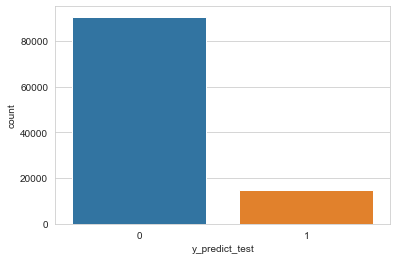

In [84]:
sns.countplot(x='y_predict_test',data=df1)

In [85]:
grid_result.best_estimator_

LogisticRegression(C=0.001, max_iter=2500, penalty='none', solver='sag')

In [86]:
y_predict_test2=grid_result.predict(X_test_data)

In [87]:
prediction2 = pd.DataFrame(y_predict_test2, columns=['y_predict_test2']).to_csv('prediction2.csv')

In [88]:
df2=pd.read_csv('prediction2.csv')

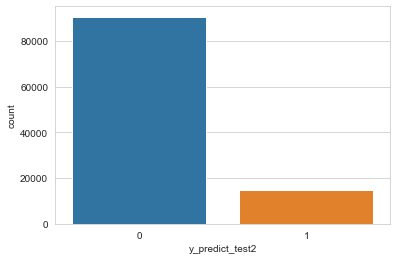

In [89]:
sns.countplot(x='y_predict_test2',data=df2)